In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Deli,1952
1,Fury,1923
2,Petticoat Pirates,1961
3,Hvem myrder hvem?,1978
4,MVP: Most Valuable Primate,2000


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
The Outsider            11
Maya                    11
Blood Money             11
She                     11
Othello                 10
Borderline              10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [7]:
titles[titles.year // 10 == 193].year.value_counts().head(3)

1937    1186
1936    1130
1938    1117
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

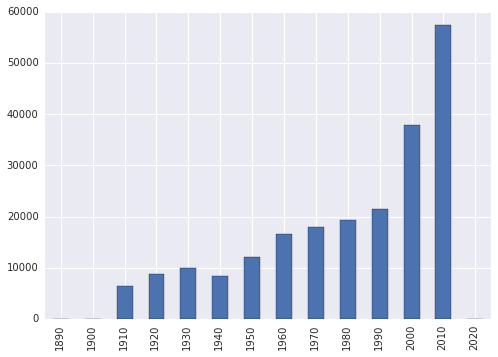

In [8]:
titles['decade'] = titles.year // 10 * 10
titles.decade.value_counts().sort_index().plot(kind="bar")

### Plot the number of "Hamlet" films made each decade.

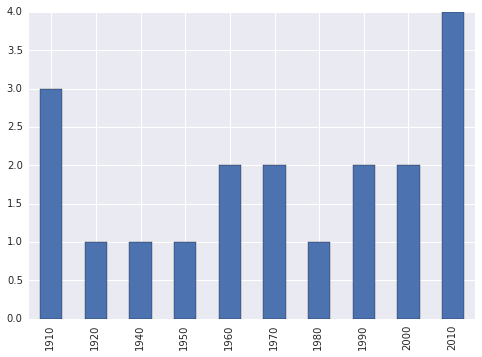

In [9]:
titles['decade'] = titles.year // 10 * 10
c = titles[titles.title == "Hamlet"]
c.decade.value_counts().sort_index().plot(kind="bar")


### Plot the number of "Rustler" characters in each decade of the history of film.

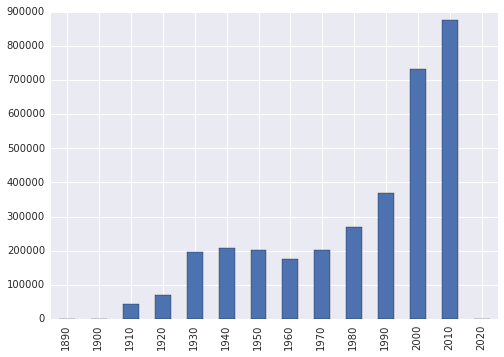

In [15]:
cast["decade"] = cast.year//10 * 10
cast.decade.value_counts().sort_index().plot(kind="bar")

### Plot the number of "Hamlet" characters each decade.

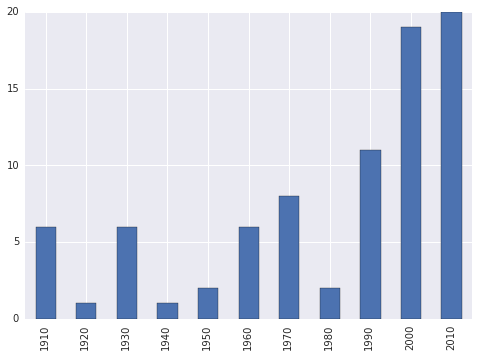

In [18]:
c = cast[cast.character=="Hamlet"]
c.decade.value_counts().sort_index().plot(kind="bar")

### What are the 11 most common character names in movie history?

In [21]:
cast.name.value_counts().head(11)

Bess Flowers       808
Herman Hack        667
Sam (II) Harris    625
Lee Phelps         613
Frank O'Connor     599
Harold Miller      590
Tom London         560
Franklyn Farnum    542
Frank Ellis        539
Larry Steers       535
Bud Osborne        509
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [24]:
cast[cast.character=="Herself"].name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Mary Jo Pehl            7
Joan Rivers             7
Lili?n Garc?a           6
Bunny Yeager            5
Kareena Kapoor          5
Chris Evert             5
Sally Jessy Raphael     5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [25]:
cast[cast.character=="Himself"].name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Franklin D. Roosevelt    20
Bill Clinton             20
George W. Bush           20
Winston Churchill        20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [27]:
cast[cast.year==1945].name.value_counts().head(5)

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      28
Bess Flowers       28
Nolan Leary        27
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [28]:
cast[cast.year==1985].name.value_counts().head(5)

Mammootty        19
Shakti Kapoor    19
Sukumari         17
Lou Scheimer     15
Aruna Irani      14
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

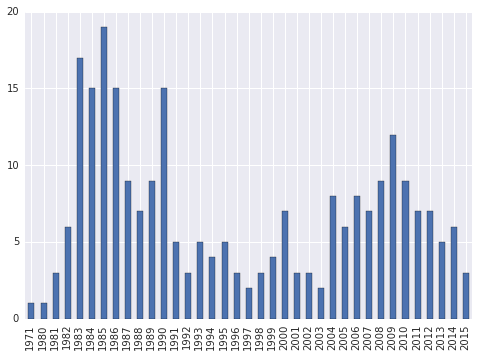

In [30]:
cast[cast.name=="Mammootty"].year.value_counts().sort_index().plot(kind="bar")

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [31]:
c = cast[cast.character.str.startswith("Patron in")]
c.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in Restaurant             3
Patron in restaurant             3
Patron in cabaret                3
Patron in Coffee Shop            2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [51]:
c = cast[cast.character.str.startswith("Science")]
c.character.value_counts().head(10)

Science Teacher         54
Science Student          8
Science Fair Student     8
Science Club Member      5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Fair Judge       4
Science Officer          3
Science Fair Teacher     3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

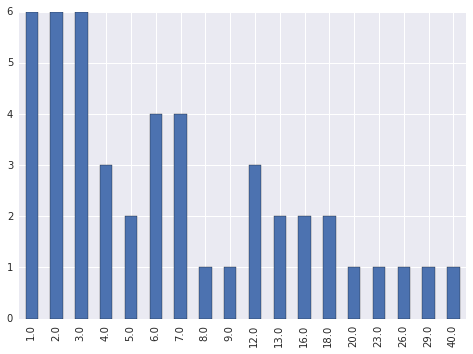

In [33]:
cast[cast.name=="Judi Dench"].n.value_counts().sort_index().plot(kind="bar")

### Plot the n-values of Cary Grant's roles through his career.

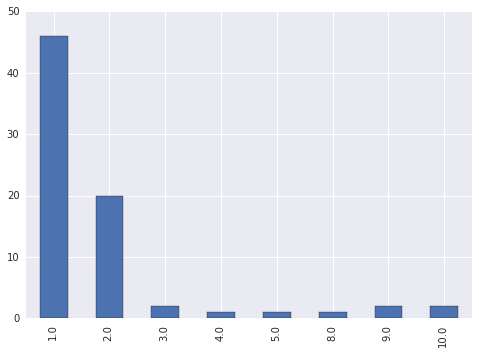

In [34]:
cast[cast.name=="Cary Grant"].n.value_counts().sort_index().plot(kind="bar")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

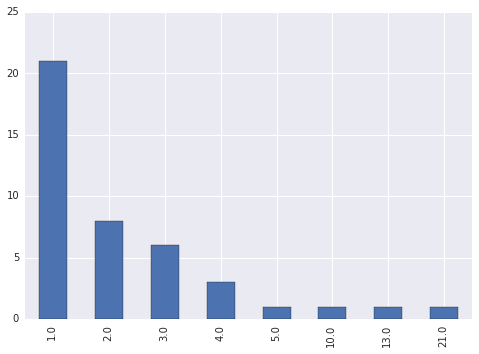

In [35]:
cast[cast.name=="Sidney Poitier"].n.value_counts().sort_index().plot(kind="bar")

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [38]:
cast[(cast.n==1) & (cast.year//10 == 195)].type.value_counts()

actor      6390
actress    2814
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [39]:
cast[(cast.n==2) & (cast.year//10 == 195)].type.value_counts()

actress    4404
actor      4385
dtype: int64